In [3]:
from asap.data.dataloader import DataSet
from asap.util import topics
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns
import colorcet as cc


sample_in = '/home/BCCRC.CA/ssubedi/projects/experiments/asapp/data/simdata/simdata_a_1.0_r_0.2_d_10000_s_1000'
sample_out = '/home/BCCRC.CA/ssubedi/projects/experiments/asapp/result/simdata/a_1.0_r_0.2_d_10000_s_1000/'

dl = DataSet(sample_in,sample_out,data_mode='sparse',data_ondisk=False)
dl.initialize_data()
print(dl.inpath)
print(dl.outpath)


/home/BCCRC.CA/ssubedi/projects/experiments/asapp/data/simdata/simdata_a_100.0_r_1.0_d_10000_s_1000
/home/BCCRC.CA/ssubedi/projects/experiments/asapp/result/simdata/a_100.0_r_1.0_d_10000_s_1000/


In [4]:
model = np.load(sample_out+'_altnmf.npz')

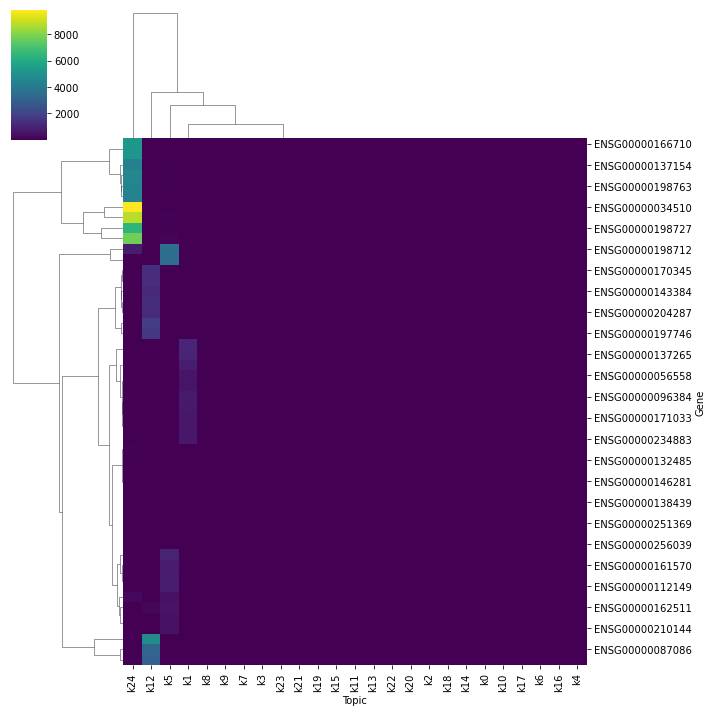

In [5]:
df_beta = pd.DataFrame(model['beta'].T)
df_beta.columns = dl.cols
df_top = topics.get_topic_top_genes(df_beta.iloc[:,:],top_n=10)
df_top = df_top.pivot(index='Topic',columns='Gene',values='Proportion')
sns.clustermap(df_top.T,cmap='viridis')

In [6]:
import umap
df_theta = pd.DataFrame(model['corr'])
df_umap= pd.DataFrame()
df_umap['cell'] = dl.rows
df_umap['topic_bulk'] = [x for x in df_theta.iloc[:,:].idxmax(axis=1)]

umap_2d = umap.UMAP(n_components=2, init='random', random_state=0,min_dist=0.9,metric='cosine')
proj_2d = umap_2d.fit(df_theta.iloc[:,1:])
df_umap[['umap1','umap2']] = umap_2d.embedding_[:,[0,1]]
df_umap

,cell,topic_bulk,umap1,umap2
0,"0_Tcell,CD4,naive[activated]",1,8.971168,3.189233
1,"1_Tcell,CD4,naive[activated]",1,8.690115,1.802514
2,"2_Tcell,CD4,naive[activated]",1,11.159677,-0.453392
3,"3_Tcell,CD4,naive[activated]",1,12.985052,0.704290
4,"4_Tcell,CD4,naive[activated]",1,9.642803,3.013665
...,...,...,...,...
14995,"995_Tcell,CD8,naive[activated]",1,10.997561,-7.195491
14996,"996_Tcell,CD8,naive[activated]",1,10.878191,-7.936877
14997,"997_Tcell,CD8,naive[activated]",1,15.800163,-3.005344
14998,"998_Tcell,CD8,naive[activated]",1,7.866455,-8.539307


Text(0, 0.5, 'UMAP2')

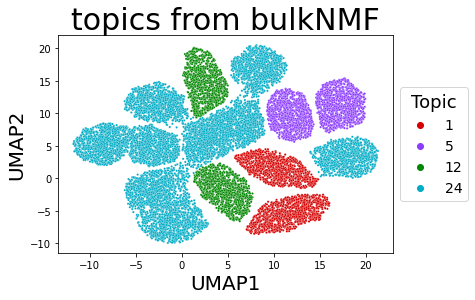

In [7]:
cp = sns.color_palette(cc.glasbey_dark, n_colors=len(df_umap['topic_bulk'].unique()))
p = sns.scatterplot(data=df_umap, x='umap1', y='umap2', hue='topic_bulk',s=5,palette=cp,legend=True)
plt.legend(title='Topic',title_fontsize=18, fontsize=14,loc='center left', bbox_to_anchor=(1, 0.5))
p.axes.set_title("topics from bulkNMF",fontsize=30)
p.set_xlabel("UMAP1",fontsize=20)
p.set_ylabel("UMAP2",fontsize=20)

Text(0, 0.5, 'UMAP2')

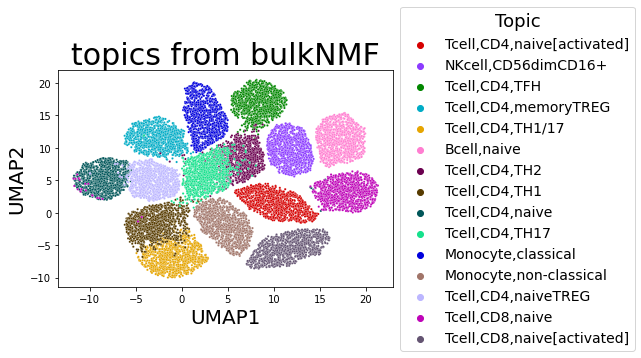

In [8]:
df_umap['cell_type'] = [x.split('_')[1] for x in df_umap['cell']]
cp = sns.color_palette(cc.glasbey_dark, n_colors=len(df_umap['cell_type'].unique()))
p = sns.scatterplot(data=df_umap, x='umap1', y='umap2', hue='cell_type',s=5,palette=cp,legend=True)
plt.legend(title='Topic',title_fontsize=18, fontsize=14,loc='center left', bbox_to_anchor=(1, 0.5))
p.axes.set_title("topics from bulkNMF",fontsize=30)
p.set_xlabel("UMAP1",fontsize=20)
p.set_ylabel("UMAP2",fontsize=20)

In [7]:
bulk_data = '/home/BCCRC.CA/ssubedi/projects/experiments/asapp/resources/dice/mean_tpm_merged.csv.gz'
df_dice = pd.read_csv(bulk_data,compression='zip')

df_dice = df_dice.set_index('gene').T

Text(218.45454545454544, 0.5, 'bulk')

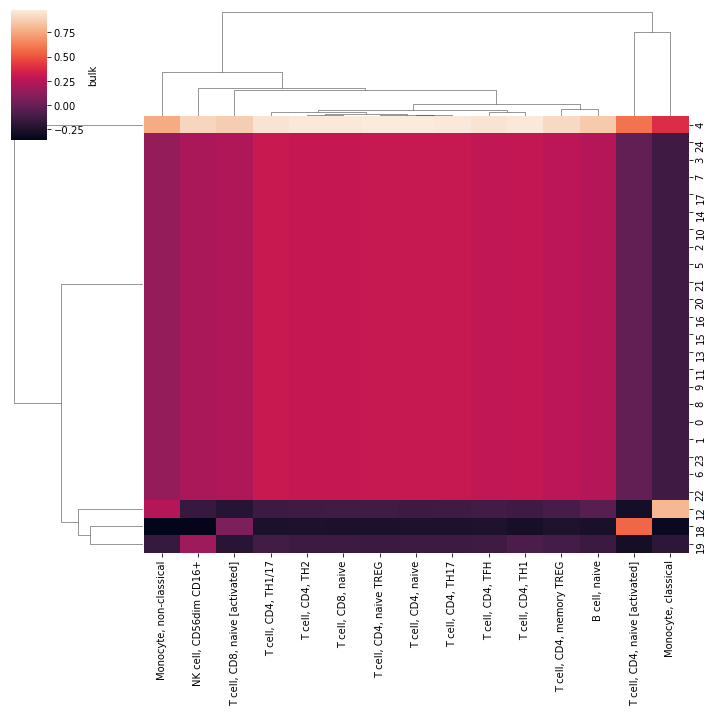

In [8]:
sel_top_genes = list(np.unique(topics.get_topic_top_genes(df_beta.iloc[:,:],top_n=10)['Gene'].values))
K=10
corr=[]
for i in df_beta.index:
    cr = []
    for j in df_dice.index:
        cr.append(np.corrcoef(df_beta.loc[i,sel_top_genes],df_dice.loc[j,sel_top_genes])[0,1])
    corr.append(cr)

df_corr = pd.DataFrame(corr)
df_corr.index = df_beta.index
df_corr.columns = df_dice.index
sns.clustermap(df_corr)
plt.xlabel('sc')
plt.ylabel('bulk')

In [9]:
df_match = df_umap[['cell','cell_type','topic_bulk']]
df_match = df_match.groupby(['cell_type','topic_bulk']).count().reset_index()
df_match = df_match.pivot('cell_type','topic_bulk')
df_match = df_match.fillna(0)
df_match


cell                       
topic_bulk                      4       12      18     19
cell_type                                                
Bcell,naive                 1000.0     0.0     0.0    0.0
Monocyte,classical             0.0  1000.0     0.0    0.0
Monocyte,non-classical         0.0  1000.0     0.0    0.0
NKcell,CD56dimCD16+          419.0     0.0     0.0  581.0
Tcell,CD4,TFH               1000.0     0.0     0.0    0.0
Tcell,CD4,TH1               1000.0     0.0     0.0    0.0
Tcell,CD4,TH1/17            1000.0     0.0     0.0    0.0
Tcell,CD4,TH17              1000.0     0.0     0.0    0.0
Tcell,CD4,TH2               1000.0     0.0     0.0    0.0
Tcell,CD4,memoryTREG        1000.0     0.0     0.0    0.0
Tcell,CD4,naive             1000.0     0.0     0.0    0.0
Tcell,CD4,naiveTREG         1000.0     0.0     0.0    0.0
Tcell,CD4,naive[activated]     0.0     0.0  1000.0    0.0
Tcell,CD8,naive             1000.0     0.0     0.0    0.0
Tcell,CD8,naive[activated]   995.0     0.0     5.0    0.0

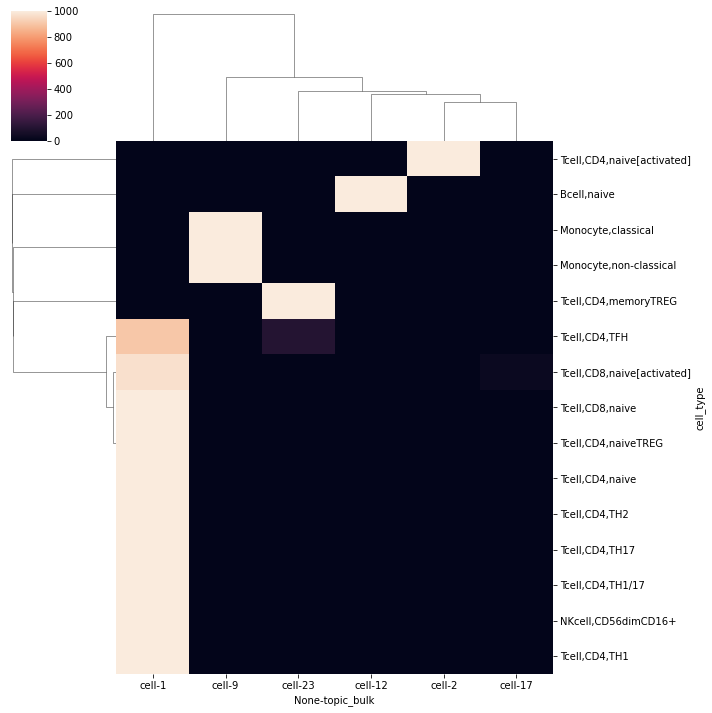

In [12]:
sns.clustermap(df_match)

In [9]:
from sklearn.metrics import normalized_mutual_info_score

normalized_mutual_info_score(df_umap['cell_type'].values,df_umap['topic_bulk'].values)

0.5823607419089311